In [6]:
import numpy as np
import datetime
import os
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scipy.stats import chi
from scipy import stats
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from functions import mean_gen, varx_gen, vary_gen, spherical_data, test_on_integers
from functions import learn_parameters, likelihood_ratio, compare_learning, compare_learning_thorough
from tensorflow.python.framework.ops import disable_eager_execution

In [2]:
# Random Seed
rand_n = 12345

# Single Point on Sphere
n = 50000
angles = np.array([4, 3])
thetas, phis = angles[0] * np.ones(n), angles[1] * np.ones(n)
x_train, x_test, y_train, y_test = spherical_data(n, thetas, phis, rand_n)


# Likelihood Ratio of Data
l_out = likelihood_ratio(x_train)

2022-08-25 12:08:04.191168: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-25 12:08:04.191307: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-25 12:08:04.191345: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-matan): /proc/driver/nvidia/version does not exist
2022-08-25 12:08:04.192831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# KERNEL INITIALIZER

s = tf.convert_to_tensor([1.]).shape
res = tf.random.uniform(s, maxval=2*np.pi, seed=rand_n), tf.random.uniform(s, maxval=np.pi, seed=rand_n)

def my_init(shape, dtype=None):
    return tf.transpose(tf.convert_to_tensor(res))

In [4]:
# LIKELIHOOD MODEL

loss_fn0 = tf.keras.losses.BinaryCrossentropy()

# Building model_angles which is used to train (theta, phi)
inputs_hold0 = tf.keras.Input(shape=(1,))
simple_linear0 = Dense(2, use_bias = False, kernel_initializer=my_init)(inputs_hold0)
model_angles0 = Model(inputs = inputs_hold0, outputs = simple_linear0)

# Building model_parmafinder, inputs, which takes the (x, y) and finds the best (theta, phi)
raw_inputs0 = tf.keras.Input(shape=(2,))
inputs0 = tf.keras.layers.concatenate([raw_inputs0, model_angles0(tf.ones_like(raw_inputs0)[:,0:1])])
output0 = likelihood_ratio(inputs0)

model_paramfinder = Model(inputs = raw_inputs0, outputs = output0)
model_paramfinder.compile(loss=loss_fn0, optimizer='Adam')
# model_paramfinder.summary()

In [5]:
# INTERPOLATED MODEL

model_interpolate = tf.keras.models.load_model('3dmodels/discrete_model_mth50_mph50')

for l in model_interpolate.layers:
    l.trainable=False
    
loss_fn = tf.keras.losses.BinaryCrossentropy()

# Building model_angles which is used to train (theta, phi)
inputs_hold = tf.keras.Input(shape=(1,))
simple_linear = Dense(2, use_bias = False, kernel_initializer=my_init)(inputs_hold)
model_angles = Model(inputs = inputs_hold, outputs = simple_linear)

# Building model_parmafinder, inputs, which takes the (x, y) and finds the best (theta, phi)
raw_inputs = tf.keras.Input(shape=(2,))
inputs = tf.keras.layers.concatenate([raw_inputs, model_angles(tf.ones_like(raw_inputs)[:,0:1])])
output = model_interpolate(inputs)

model_interpolate_paramfinder = Model(inputs = raw_inputs, outputs = output)
model_interpolate_paramfinder.compile(loss=loss_fn, optimizer='Adam')

x_inputs = x_train[:, 0:2]

Initialized at  tf.Tensor([4.2369995 2.0416322], shape=(2,), dtype=float32) tf.Tensor([4.2369995 2.0416322], shape=(2,), dtype=float32)
267/267 [==============================] - 1s 3ms/step - loss: 0.5882
0 Fitted result 1:  tf.Tensor([4.4268646 2.2718146], shape=(2,), dtype=float32)
0 Fitted result 2:  tf.Tensor([4.2847733 2.2615519], shape=(2,), dtype=float32)
267/267 [==============================] - 1s 3ms/step - loss: 0.5857
1 Fitted result 1:  tf.Tensor([4.5602093 2.4531379], shape=(2,), dtype=float32)
1 Fitted result 2:  tf.Tensor([4.3474307 2.41834  ], shape=(2,), dtype=float32)
267/267 [==============================] - 1s 3ms/step - loss: 0.5843
2 Fitted result 1:  tf.Tensor([4.6290684 2.5922914], shape=(2,), dtype=float32)
2 Fitted result 2:  tf.Tensor([4.386681  2.5361762], shape=(2,), dtype=float32)
267/267 [==============================] - 1s 3ms/step - loss: 0.5835
3 Fitted result 1:  tf.Tensor([4.65961  2.703093], shape=(2,), dtype=float32)
3 Fitted result 2:  tf.Ten

267/267 [==============================] - 1s 3ms/step - loss: 0.5824
27 Fitted result 1:  tf.Tensor([4.3564    3.0200627], shape=(2,), dtype=float32)
27 Fitted result 2:  tf.Tensor([3.66157   3.2040122], shape=(2,), dtype=float32)
267/267 [==============================] - 1s 3ms/step - loss: 0.5826
28 Fitted result 1:  tf.Tensor([4.3495483 3.02151  ], shape=(2,), dtype=float32)
28 Fitted result 2:  tf.Tensor([3.6422539 3.2106411], shape=(2,), dtype=float32)
267/267 [==============================] - 1s 3ms/step - loss: 0.5829
29 Fitted result 1:  tf.Tensor([4.3430605 3.020261 ], shape=(2,), dtype=float32)
29 Fitted result 2:  tf.Tensor([3.6274006 3.2205372], shape=(2,), dtype=float32)
267/267 [==============================] - 1s 3ms/step - loss: 0.5825
30 Fitted result 1:  tf.Tensor([4.3327937 3.0297043], shape=(2,), dtype=float32)
30 Fitted result 2:  tf.Tensor([3.6304584 3.2205927], shape=(2,), dtype=float32)
267/267 [==============================] - 1s 3ms/step - loss: 0.5827
31

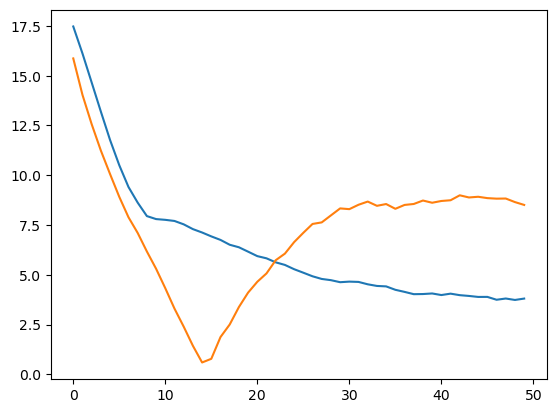

In [6]:
epochs, iterations, batch_size = 1, 50, 300

# # Likelihood Stats
# weights0 = learn_parameters(model_paramfinder, x_train, y_train, iterations, epochs, batch_size)
# angle_errors0 = (angles - weights0) / angles
# average_error0 = np.sum(np.abs(angle_errors0)) / 2


# Comparing
list1, list2 = compare_learning(model_paramfinder, model_interpolate_paramfinder, angles,
                                      x_train, y_train, iterations, epochs, batch_size)

Text(0, 0.5, 'Error %')

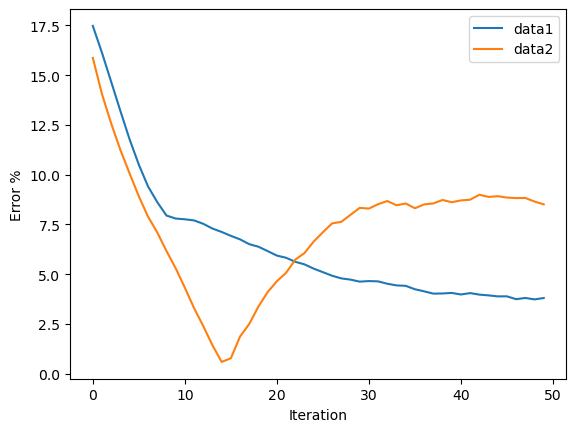

In [13]:
# a1 = np.array(list1)
# a2 = np.array(list2)
# e1 = 100 * np.sum(np.abs((angles - a1) / angles), axis = 1)/2
# e2 = 100 * np.sum(np.abs((angles - a2) / angles), axis = 1)/2

# plt.plot(e1, label='data1')
# plt.plot(e2, label='data2')
# plt.legend()
# plt.xlabel('Iteration')
# plt.ylabel('Error %')

Initialized at  tf.Tensor([2.118283  0.7864794], shape=(2,), dtype=float32) tf.Tensor([2.118283  0.7864794], shape=(2,), dtype=float32)
800/800 [==============================] - 3s 3ms/step - loss: 0.6413
0 Fitted result 1:  tf.Tensor([2.750708  1.5213879], shape=(2,), dtype=float32)
0 Fitted result 2:  tf.Tensor([2.5748122 1.5276898], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.6068
1 Fitted result 1:  tf.Tensor([2.9888613 2.1859498], shape=(2,), dtype=float32)
1 Fitted result 2:  tf.Tensor([2.9730852 2.0608268], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.5928
2 Fitted result 1:  tf.Tensor([3.0768604 2.6463854], shape=(2,), dtype=float32)
2 Fitted result 2:  tf.Tensor([3.2551448 2.4197917], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.5875
3 Fitted result 1:  tf.Tensor([3.1256902 2.8977852], shape=(2,), dtype=float32)
3 Fitted result 2:  tf.T

800/800 [==============================] - 3s 3ms/step - loss: 0.5845
13 Fitted result 1:  tf.Tensor([3.8883958 3.0238404], shape=(2,), dtype=float32)
13 Fitted result 2:  tf.Tensor([3.8396397 3.1120577], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 3ms/step - loss: 0.5843
14 Fitted result 1:  tf.Tensor([3.9177155 3.0227592], shape=(2,), dtype=float32)
14 Fitted result 2:  tf.Tensor([3.7892845 3.1321673], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 3ms/step - loss: 0.5846
15 Fitted result 1:  tf.Tensor([3.954299  3.0227344], shape=(2,), dtype=float32)
15 Fitted result 2:  tf.Tensor([3.7207553 3.1599033], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 3ms/step - loss: 0.5845
16 Fitted result 1:  tf.Tensor([3.9831655 3.016154 ], shape=(2,), dtype=float32)
16 Fitted result 2:  tf.Tensor([3.7009044 3.1488888], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 3ms/step - loss: 0.5847
17

Initialized at  tf.Tensor([5.845927  1.9773649], shape=(2,), dtype=float32) tf.Tensor([5.845927  1.9773649], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.5912
0 Fitted result 1:  tf.Tensor([5.4542856 2.4219825], shape=(2,), dtype=float32)
0 Fitted result 2:  tf.Tensor([5.426782  2.4024377], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.5870
1 Fitted result 1:  tf.Tensor([5.2828345 2.66466  ], shape=(2,), dtype=float32)
1 Fitted result 2:  tf.Tensor([5.129191  2.5809963], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.5862
2 Fitted result 1:  tf.Tensor([5.188391  2.8491745], shape=(2,), dtype=float32)
2 Fitted result 2:  tf.Tensor([4.8982086 2.6541615], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.5856
3 Fitted result 1:  tf.Tensor([5.1281238 2.9805434], shape=(2,), dtype=float32)
3 Fitted result 2:  tf.T

([<tf.Tensor: shape=(2,), dtype=float32, numpy=array([5.4542856, 2.4219825], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([5.2828345, 2.66466  ], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([5.188391 , 2.8491745], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([5.1281238, 2.9805434], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([5.0857043, 3.042498 ], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([5.0443144, 3.0620115], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.993573, 3.060674], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.918033, 3.063892], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.8374214, 3.0543778], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.7337117, 3.0333796], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.645565 ,

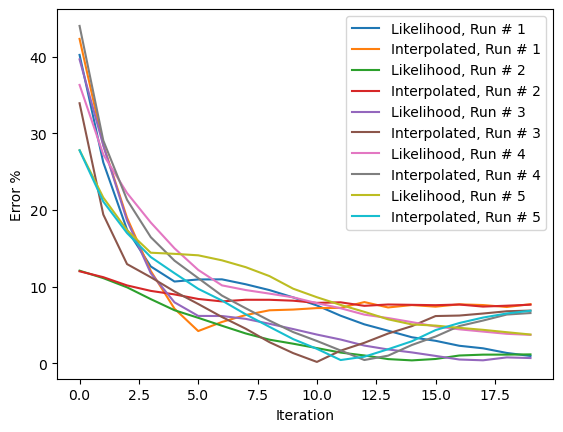

In [6]:
compare_learning_thorough(angles, x_train, y_train, 20, 1, 100, 5, rand_n)

In [10]:
def compare_learning_thorough(angles, x_train, y_train, iterations=20, epochs=1, batch_size=100, runs=5, seed=12345):
    listlist1, listlist2 = [], []
    for j in range(runs):
        # KERNEL INITIALIZER
        s = tf.convert_to_tensor([1.]).shape
        res = tf.random.uniform(s, maxval=2*np.pi, seed=seed), tf.random.uniform(s, maxval=np.pi, seed=seed)
        def my_init(shape, dtype=None):
            return tf.transpose(tf.convert_to_tensor(res))


        # LIKELIHOOD MODEL
        loss_fn0 = tf.keras.losses.BinaryCrossentropy()
        # Building model_angles which is used to train (theta, phi)
        inputs_hold0 = tf.keras.Input(shape=(1,))
        simple_linear0 = Dense(2, use_bias = False, kernel_initializer=my_init)(inputs_hold0)
        model_angles0 = Model(inputs = inputs_hold0, outputs = simple_linear0)
        # Building model_parmafinder, inputs, which takes the (x, y) and finds the best (theta, phi)
        raw_inputs0 = tf.keras.Input(shape=(2,))
        inputs0 = tf.keras.layers.concatenate([raw_inputs0, model_angles0(tf.ones_like(raw_inputs0)[:,0:1])])
        output0 = likelihood_ratio(inputs0)
        model_paramfinder = Model(inputs = raw_inputs0, outputs = output0)
        model_paramfinder.compile(loss=loss_fn0, optimizer='Adam')


        # INTERPOLATED MODEL
        model_interpolate = tf.keras.models.load_model('3dmodels/discrete_model_mth30_mph30')
        for l in model_interpolate.layers:
            l.trainable=False
        loss_fn = tf.keras.losses.BinaryCrossentropy()
        # Building model_angles which is used to train (theta, phi)
        inputs_hold = tf.keras.Input(shape=(1,))
        simple_linear = Dense(2, use_bias = False, kernel_initializer=my_init)(inputs_hold)
        model_angles = Model(inputs = inputs_hold, outputs = simple_linear)
        # Building model_parmafinder, inputs, which takes the (x, y) and finds the best (theta, phi)
        raw_inputs = tf.keras.Input(shape=(2,))
        inputs = tf.keras.layers.concatenate([raw_inputs, model_angles(tf.ones_like(raw_inputs)[:,0:1])])
        output = model_interpolate(inputs)
        model_interpolate_paramfinder = Model(inputs = raw_inputs, outputs = output)
        model_interpolate_paramfinder.compile(loss=loss_fn, optimizer='Adam')


        model_pf1, model_pf2 = model_paramfinder, model_interpolate_paramfinder
        e, b = epochs, batch_size
        x_inputs = x_train[:, 0:2]
        print('Initialized at ', model_pf1.trainable_weights[:][0][0], model_pf2.trainable_weights[:][0][0])
        list1, list2 = [], []
        for i in range(iterations):
            model_pf1.fit(x_inputs, y_train, epochs=e, batch_size=b)
            model_pf2.fit(x_inputs, y_train, epochs=e, batch_size=b)
            list1.append(model_pf1.trainable_weights[:][0][0])
            list2.append(model_pf2.trainable_weights[:][0][0])
            print(i,"Fitted result 1: ", model_pf1.trainable_weights[:][0][0])
            print(i,"Fitted result 2: ", model_pf2.trainable_weights[:][0][0])
        
        a1, a2 = np.array(list1), np.array(list2)
        e1 = 100 * np.sum(np.abs((angles - a1) / angles), axis = 1)/2
        e2 = 100 * np.sum(np.abs((angles - a2) / angles), axis = 1)/2
        plt.plot(e1, label='Likelihood, Run # %.0f' % (j+1))
        plt.plot(e2, label='Interpolated, Run # %.0f' % (j+1))
        listlist1.append(list1)
        listlist2.append(list2)
        
    plt.legend()
    plt.xlabel('Iteration')
    plt.ylabel('Error %')
        

    return list1, list2

Initialized at  tf.Tensor([2.9951634 2.9750016], shape=(2,), dtype=float32) tf.Tensor([2.9951634 2.9750016], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.5878
0 Fitted result 1:  tf.Tensor([3.1223593 3.0625603], shape=(2,), dtype=float32)
0 Fitted result 2:  tf.Tensor([3.235759 3.220812], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 3ms/step - loss: 0.5869
1 Fitted result 1:  tf.Tensor([3.2365694 3.076067 ], shape=(2,), dtype=float32)
1 Fitted result 2:  tf.Tensor([3.4424765 3.3147748], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.5866
2 Fitted result 1:  tf.Tensor([3.364449  3.0764244], shape=(2,), dtype=float32)
2 Fitted result 2:  tf.Tensor([3.5981774 3.3500304], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.5864
3 Fitted result 1:  tf.Tensor([3.479436  3.0578246], shape=(2,), dtype=float32)
3 Fitted result 2:  tf.Ten

800/800 [==============================] - 2s 2ms/step - loss: 0.5858
13 Fitted result 1:  tf.Tensor([4.551999 2.998568], shape=(2,), dtype=float32)
13 Fitted result 2:  tf.Tensor([4.9242687 2.9794757], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.5857
14 Fitted result 1:  tf.Tensor([4.522857 3.005665], shape=(2,), dtype=float32)
14 Fitted result 2:  tf.Tensor([4.9237723 2.9771957], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.5856
15 Fitted result 1:  tf.Tensor([4.4967766 3.0019264], shape=(2,), dtype=float32)
15 Fitted result 2:  tf.Tensor([4.9380603 2.9687126], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.5856
16 Fitted result 1:  tf.Tensor([4.471205  2.9948308], shape=(2,), dtype=float32)
16 Fitted result 2:  tf.Tensor([4.902171 2.990303], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.5857
17 Fitte

Initialized at  tf.Tensor([1.9506581 1.6998965], shape=(2,), dtype=float32) tf.Tensor([1.9506581 1.6998965], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.6040
0 Fitted result 1:  tf.Tensor([2.4340484 2.3550718], shape=(2,), dtype=float32)
0 Fitted result 2:  tf.Tensor([1.9377829 2.3031025], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.5926
1 Fitted result 1:  tf.Tensor([2.5822504 2.741572 ], shape=(2,), dtype=float32)
1 Fitted result 2:  tf.Tensor([1.6853118 2.692369 ], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.5894
2 Fitted result 1:  tf.Tensor([2.6363027 2.9602427], shape=(2,), dtype=float32)
2 Fitted result 2:  tf.Tensor([1.5252717 2.9020658], shape=(2,), dtype=float32)
800/800 [==============================] - 2s 2ms/step - loss: 0.5886
3 Fitted result 1:  tf.Tensor([2.6634371 3.075324 ], shape=(2,), dtype=float32)
3 Fitted result 2:  tf.T

([<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.4340484, 2.3550718], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.5822504, 2.741572 ], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.6363027, 2.9602427], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.6634371, 3.075324 ], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.6742532, 3.1168315], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.6824207, 3.1382327], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.6881497, 3.150185 ], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.6873507, 3.1474476], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.6838522, 3.152809 ], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.6496108, 3.1352694], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.6336

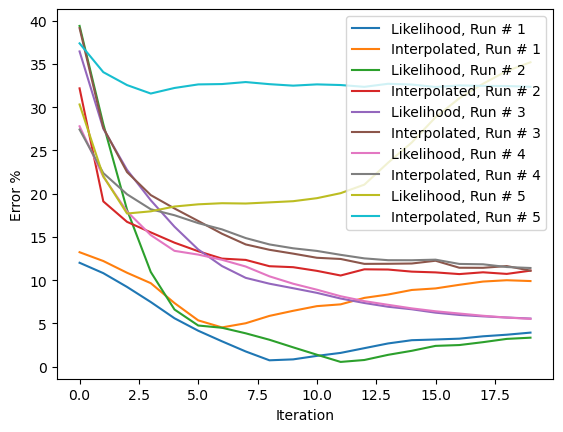

In [11]:
compare_learning_thorough(angles, x_train, y_train, 20, 1, 100, 5, rand_n)

In [33]:
# MANUAL TESTING

# xr = model_interpolate(x_train).numpy().transpose()[0]
# y = model_interpolate(x_train)
# loss = np.sum(-y_train * np.log(xr) - (1-y_train) * np.log(1-xr)) / xr.shape[0]
# print(loss)

# x_train_mod = np.copy(x_train)
# x_train_mod[:, 2] = x_train[:, 2]
# x_train_mod[:, 3] = x_train[:, 3] - .1
# xr_mod = model_interpolate(x_train_mod).numpy().transpose()[0]
# y_mod = model_interpolate(x_train_mod)
# loss_mod = np.sum(-y_train * np.log(xr_mod) - (1-y_train) * np.log(1-xr_mod)) / xr_mod.shape[0]
# print(loss_mod)

# xr = likelihood_ratio(x_train).numpy().transpose()
# y = likelihood_ratio(x_train)
# loss = np.sum(-y_train * np.log(xr) - (1-y_train) * np.log(1-xr)) / xr.shape[0]
# print(loss)

# x_train_mod = np.copy(x_train)
# x_train_mod[:, 2] = x_train[:, 2] - .05
# x_train_mod[:, 3] = x_train[:, 3] - .05
# xr_mod = likelihood_ratio(x_train_mod).numpy().transpose()
# y_mod = likelihood_ratio(x_train_mod)
# loss_mod = np.sum(-y_train * np.log(xr_mod) - (1-y_train) * np.log(1-xr_mod)) / xr_mod.shape[0]
# print(loss_mod)

0.6019409317687167
